<h2 style="color: #e0e0e0 !important; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px;">
  🧰 Importing All Necessary Libraries
</h2>

<p style="color: 4a4a4a; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6;">
  Before beginning the analysis, all required Python libraries such as <code>pandas</code>, <code>numpy</code>, <code>matplotlib</code>, and <code>seaborn</code> were imported. These libraries provide powerful tools for data manipulation, visualization, and statistical analysis.
</p>


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(style="whitegrid")


<h2 style="color: #f1f1f1; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px;">
  📂 Reading the Zomato Dataset for EDA
</h2>

<p style="color: #cccccc; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6;">
  The Zomato India dataset was loaded using <code>pandas.read_csv()</code>. This dataset contains detailed information about restaurants across various Indian cities. It serves as the foundation for all exploratory data analysis and insight generation throughout this project.
</p>


In [32]:
data="zomato_restaurants_in_India.csv"
df=pd.read_csv(data)
df.head(2)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1


<h2 style="color: #f1f1f1; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px;">
  📋 Verifying Columns After Import
</h2>

<p style="color: #cccccc; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6;">
  After loading the dataset using <code>pd.read_csv()</code>, the columns were reviewed to understand the structure of the data. This step helps identify key features, detect any formatting issues, and plan the next steps in the cleaning and analysis process.
</p>


In [33]:
print(df.dtypes) #for data types
print(df.shape) #for shape of the data
print(df.columns) #for columns in the data
# (df.isnull().sum()) #for null values in the data
# df.describe() #for statistical description of the data

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object
(211944, 26)
Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'countr

<h2 style="color: #f1f1f1; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px;">
  🗂️ Filtering & Renaming Columns for Convenience
</h2>

<p style="color: #cccccc; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6;">
  To streamline the analysis, only the most relevant columns were retained, and certain column names were renamed for better readability and ease of use during exploration.
</p>


In [34]:
#removing unnecessary columns
#url, address, locality_verbose, photo_count, city_id, country_id, zipcode,
df.drop(columns=[
    'url', 'address', 'locality_verbose', 'photo_count',
    'city_id', 'country_id', 'zipcode', 'res_id'
], inplace=True)

df.head(2)

,name,establishment,city,locality,latitude,longitude,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,opentable_support,delivery,takeaway
0,Bikanervala,['Quick Bites'],Agra,Khandari,27.211450,78.002381,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,0.0,-1,-1
1,Mama Chicken Mama Franky House,['Quick Bites'],Agra,Agra Cantt,27.160569,78.011583,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,0.0,-1,-1


In [35]:
# Renaming columns for convenience
df.rename(columns={
    'average_cost_for_two': 'cost',
    'aggregate_rating': 'rating'
}, inplace=True)


<h2 style="color: #f1f1f1; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px;">
  🧹 Cleaning the Necessary Columns
</h2>


In [36]:
#finding missing values in the data
missing_percent = df.isnull().mean()* 100
print(missing_percent[missing_percent > 0])#filtering out the great missing valued columns

cuisines             0.656305
timings              1.827841
opentable_support    0.022647
dtype: float64


<h2 style="color: #f1f1f1; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
  🛠️ Fixing the Missing Values
</h2>

<ul style="color: #cccccc; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6;">
  <li><em>Cuisines</em>: Contains relatively fewer null values, so it's appropriate to <strong>drop those rows</strong>.</li>
  <li><em>Timings</em>: Has a higher percentage of missing data, so it's better to <strong>fill with "NOT AVAILABLE"</strong>.</li>
  <li><em>Opentable Support</em>: Only ~0.2% missing, which is negligible, so we <strong>fill with 0</strong>.</li>
</ul>


In [37]:
df = df[~df['cuisines'].isnull()]
df['timings'] = df['timings'].fillna('Not Available')
df['opentable_support'] = df['opentable_support'].fillna(0)

df.isnull().sum() #checking if all the null values are handled

name                 0
establishment        0
city                 0
locality             0
latitude             0
longitude            0
cuisines             0
timings              0
cost                 0
price_range          0
currency             0
highlights           0
rating               0
rating_text          0
votes                0
opentable_support    0
delivery             0
takeaway             0
dtype: int64

<!-- <h2> This is the problem statement I have used for EDA Analysis</h2>

<p>This project performs an in-depth Exploratory Data Analysis (EDA)  on restaurant listings from Zomato across Indian cities. The goal is to extract valuable  business insights, analyze consumer behavior , and identify patterns that could help a platform like Zomato  optimize services, target expansion , and enhance customer engagement.</p><br>
<b>This is Solved by this problems</b><br><br>
1.Top Cities by Restaurant Count<br>
2.Most Popular Cuisines<br>
3.Average Cost for Two by City<br>
4.Does High Rating Mean High Cost?<br>
5.Votes vs Ratings: Do People Rate What They Vote?<br>
6.Do Online Delivery & Table Booking Affect Ratings?<br>
7.Top-Rated Restaurants by City<br>
8.Cuisines vs Cost<br>
9.Best Value-for-Money Restaurants<br>
10.Business Recommendations








 -->
<h2 style="color: #f1f1f1; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
  📊 Problem Statement Used for EDA Analysis
</h2>

<p style="font-size: 16px; line-height: 1.6; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #dcdcdc;">
  This project performs an in-depth <strong>Exploratory Data Analysis (EDA)</strong> on restaurant listings from 
  <strong>Zomato</strong> across Indian cities. The goal is to extract valuable business insights, analyze 
  consumer behavior, and identify patterns that could help a platform like Zomato optimize services, 
  target expansion, and enhance customer engagement.
</p>

<h3 style="color: #e0e0e0; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px;">
  ✅ Solved Through the Following Key Questions:
</h3>

<ol style="line-height: 1.8; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #cccccc;">
  <li><strong>Top Cities by Restaurant Count</strong></li>
  <li><strong>Most Popular Cuisines</strong></li>
  <li><strong>Average Cost for Two by City</strong></li>
  <li><strong>Does High Rating Mean High Cost?</strong></li>
  <li><strong>Votes vs Ratings: Do People Rate What They Vote?</strong></li>
  <li><strong>Do Online Delivery & Table Booking Affect Ratings?</strong></li>
  <li><strong>Top-Rated Restaurants by City</strong></li>
  <li><strong>Cuisines vs Cost</strong></li>
  <li><strong>Best Value-for-Money Restaurants</strong></li>
  <li><strong>Business Recommendations</strong></li>
</ol>



<h3 style="color: #e0e0e0; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 25px;">
  <i>1️⃣ Top Cities by Restaurant Count</i>
</h3>


In [10]:
top_cities=df['city'].value_counts().head(10) #for viewing top 10 cities with most restaurants
top_cities

city
Chennai      11630
Mumbai        6497
Bangalore     4971
Pune          4217
Lucknow       4120
Jabalpur      3966
New Delhi     3918
Jaipur        3713
Kochi         3370
Ajmer         3275
Name: count, dtype: int64

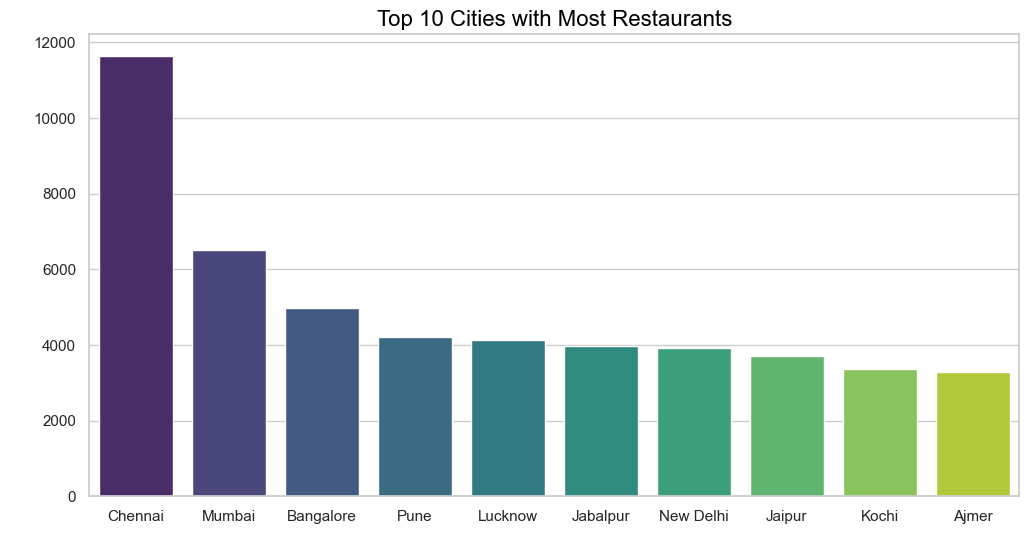

In [11]:
#plotting graph to show  top cities for visuaisation
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis',hue=top_cities.index)
plt.title('Top 10 Cities with Most Restaurants', fontsize=16, color='black')
plt.xlabel('City', fontsize=14, color='white')
plt.ylabel('Number of Restaurants', fontsize=14, color='white')
plt.show()

<h3 style="color: #e0e0e0; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px;">
  <i>2️⃣ Most Popular Cuisines</i>
</h3>

In [12]:
cuisine_series=df['cuisines'].str.split(',')
print(cuisine_series.isnull().sum()) #checking for null values in cuisines column

cuisineer= cuisine_series.explode().str.lower().str.strip()#splitting into single cuisines, converting to lowercase and stripping whitespace
top_cuisines=cuisineer.value_counts().head(10)#getting top 10 cuisines
top_cuisines

0


cuisines
north indian    85965
chinese         57989
fast food       48584
south indian    28895
continental     26126
beverages       24382
cafe            23140
desserts        21437
italian         20920
biryani         18315
Name: count, dtype: int64

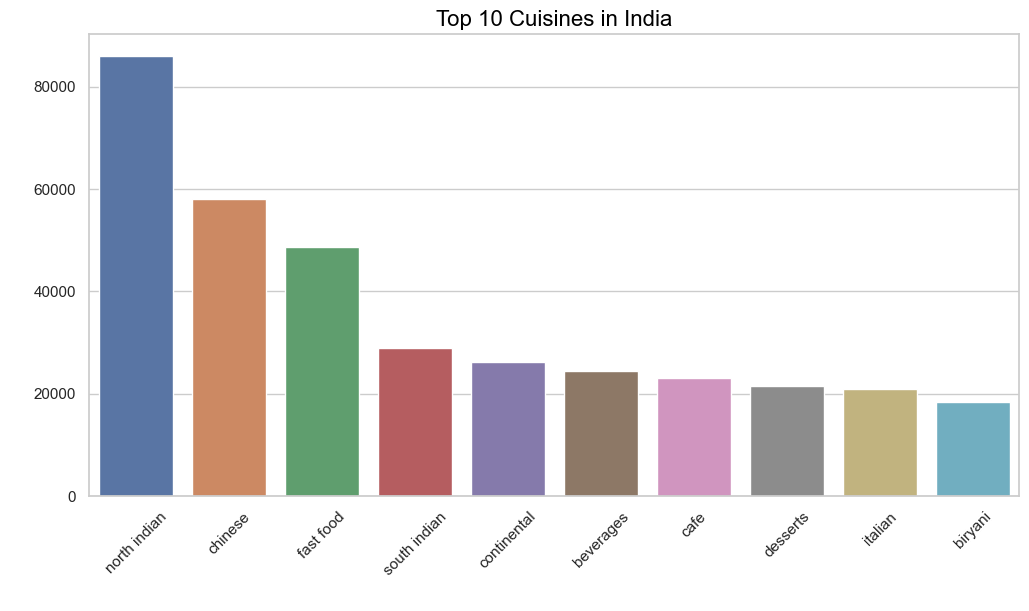

In [13]:
#plotting them 
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines.index,y=top_cuisines.values,hue=top_cuisines.index)
plt.title('Top 10 Cuisines in India', fontsize=16, color='black')
plt.xlabel('Cuisines', fontsize=14, color='white')
plt.ylabel('Number of Restaurants', fontsize=14, color='white')
plt.xticks(rotation=45)
plt.show()

<h3 style="color: #e0e0e0; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px;">
  <i>3️⃣ Average Cost for Two by City</i>
</h3>

In [120]:
avg_cost_city=df.groupby('city')['cost'].mean().sort_values(ascending=False) #calculating average cost for two in each city and sorting them
avg_cost_city.head(10)

city
Mumbai       1388.994921
New Delhi    1379.698826
Gurgaon      1333.906977
Bangalore    1036.187890
Pune          979.858904
Goa           959.983289
Noida         943.661670
Hyderabad     929.701084
Chennai       898.277730
Jaipur        897.188257
Name: cost, dtype: float64

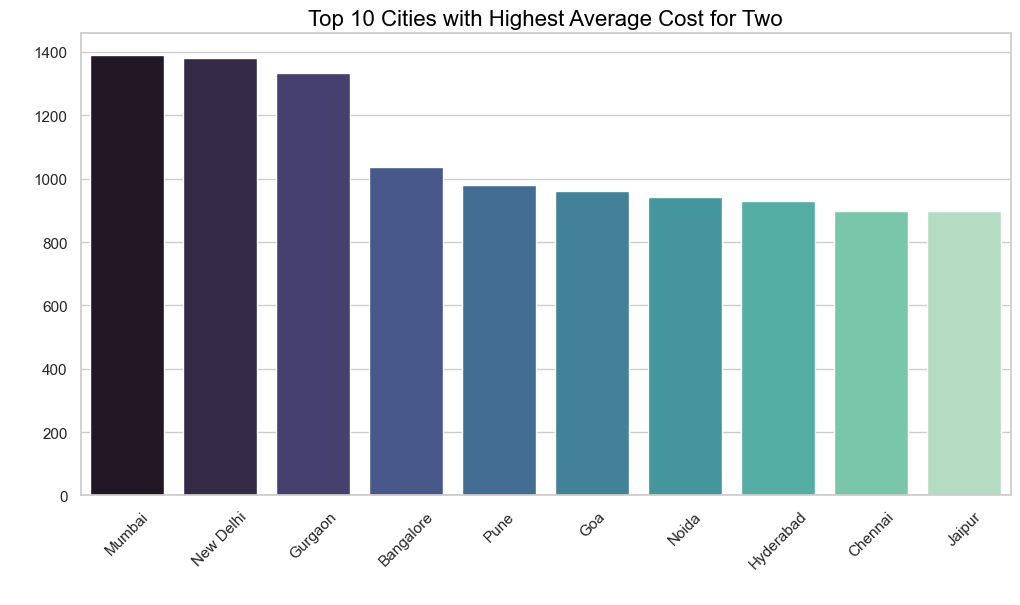

In [ ]:
#plotting top 10 cities with highest average cost for two
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_cost_city.head(10).index,y=avg_cost_city.head(10).values,hue=avg_cost_city.head(10).index, palette='mako')
plt.title('Top 10 Cities with Highest Average Cost for Two', fontsize=16, color='black')
plt.xlabel('City', fontsize=14, color='black')
plt.ylabel('Average Cost for Two', fontsize=14, color='black')
plt.xticks(rotation=45)
plt.show()

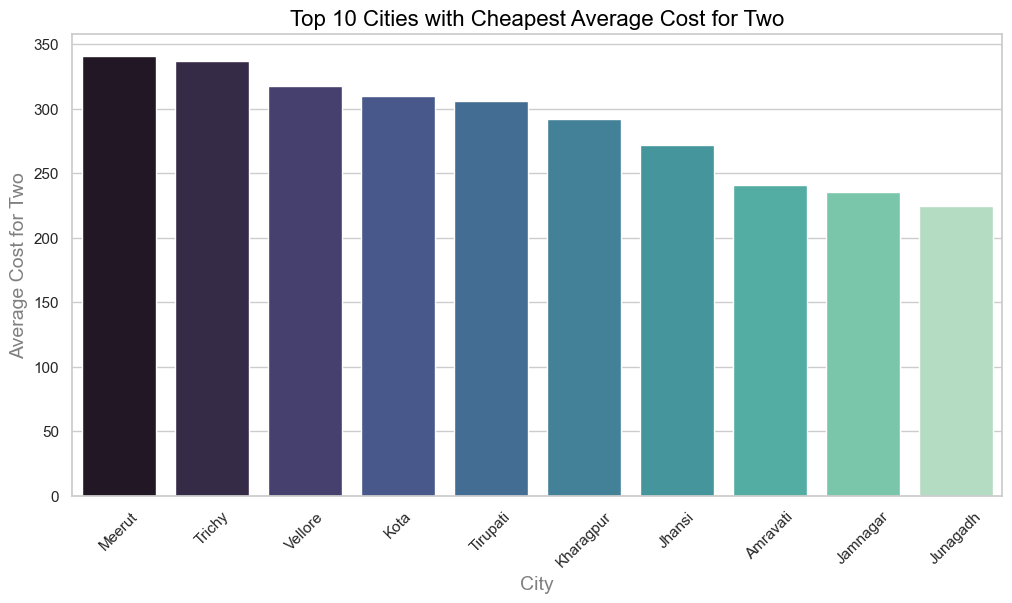

In [125]:
#plotting top 10 cities with cheapest average cost for two
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_cost_city.tail(10).index,y=avg_cost_city.tail(10).values,hue=avg_cost_city.tail(10).index, palette='mako')
plt.title('Top 10 Cities with Cheapest Average Cost for Two', fontsize=16, color='black')
plt.xlabel('City', fontsize=14, color='gray')
plt.ylabel('Average Cost for Two', fontsize=14, color='gray')
plt.xticks(rotation=45)
plt.show()

<h3 style="color: #e0e0e0; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px;">
  <i>4️⃣ Does High Rating Mean High Cost?</i>
</h3>

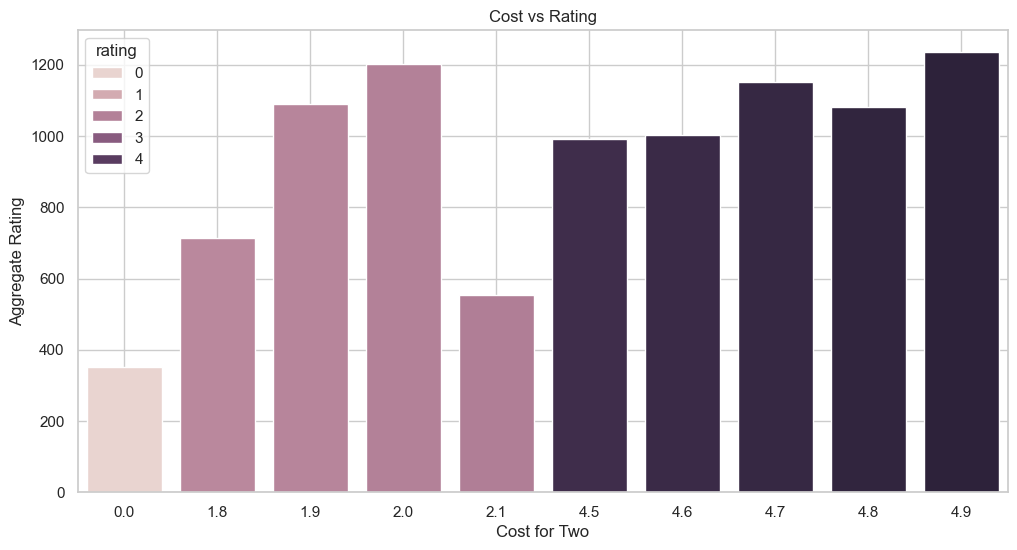

In [17]:
plt.figure(figsize=(12,6))
# print(df.cost)
rf=df.groupby('rating')['cost'].mean().sort_index(ascending=False)#grouping by rating and getting mean cost for two
top5=rf.head(5) #getting top 5 ratings
bottom5=rf.tail(5) #getting bottom 5 ratings
combined=pd.concat([top5,bottom5]) #combining top and bottom ratings

sns.barplot(x=combined.index,y=combined.values,hue=combined.index)
plt.title('Cost vs Rating')
plt.xlabel('Cost for Two')
plt.ylabel('Aggregate Rating')
plt.grid(True)

plt.show()

<h3 style="color: #e0e0e0; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px;">
  <i>5️⃣ Votes vs Ratings: Do People Rate What They Vote?</i>
</h3>

In [41]:
df_uniques=df.drop_duplicates(subset=['name', 'votes','cost','rating','city'])  # Dropping duplicates based on name and city
df['name']

top_voted = df_uniques[['name', 'votes', 'rating', 'cost', 'city']].sort_values(by='votes', ascending=False).head(10)
top_voted

,name,votes,rating,cost,city
77763,Bawarchi,42539,4.5,750,Hyderabad
19636,Byg Brewski Brewing Company,18967,4.9,1600,Bangalore
19648,Toit,15705,4.6,1000,Bangalore
19641,Truffles,15582,4.6,900,Bangalore
53891,Hauz Khas Social,14751,4.8,1300,New Delhi
19677,AB's - Absolute Barbecues,13095,4.8,1600,Bangalore
77720,Paradise,12829,4.7,800,Secunderabad
77907,Shah Ghouse Hotel & Restaurant,12471,4.2,800,Hyderabad
114360,Peter Cat,11856,4.2,1200,Kolkata
19667,The Black Pearl,11776,4.7,1500,Bangalore


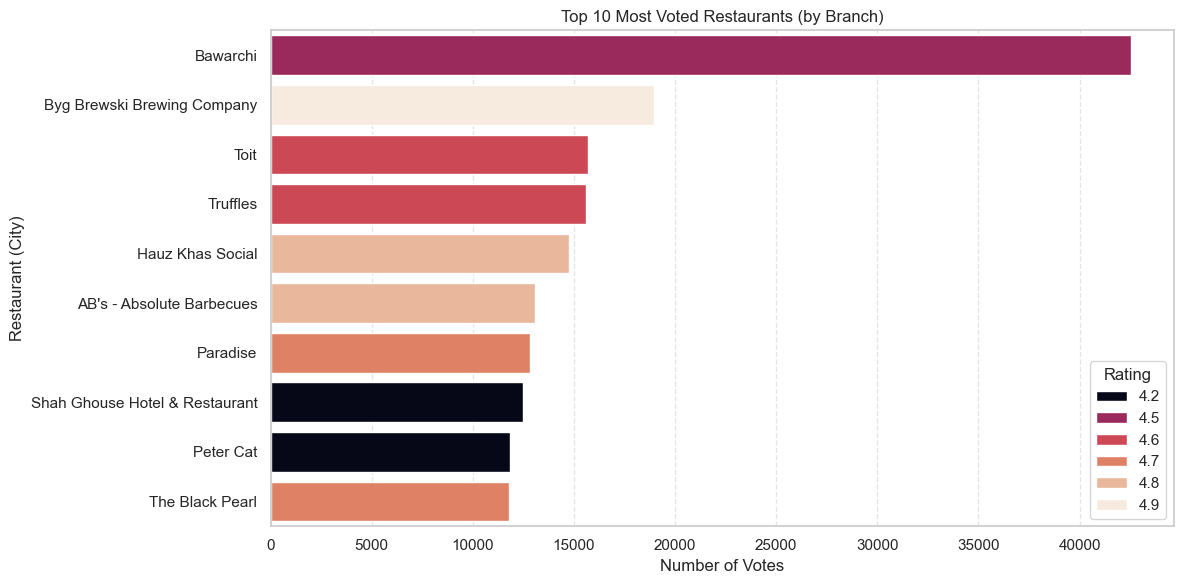

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x='votes', y='name', data=top_voted, hue='rating', dodge=False, palette='rocket')
plt.title('Top 10 Most Voted Restaurants (by Branch)')
plt.xlabel('Number of Votes')
plt.ylabel('Restaurant (City)')
plt.legend(title='Rating')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h3 style="color: #e0e0e0; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px;">
  <i>6️⃣ Do Online Delivery & Table Booking Affect Ratings?</i>
</h3>

In [48]:
print(df['delivery'].value_counts()) #checking the delivery column for unique values
df['takeaway'].value_counts() #checking the takeaway column for unique values
# delivery_group = df.groupby('delivery')[['votes', 'rating']].mean().round(2)
# delivery_group

delivery
-1    131234
 1     78285
 0      1034
Name: count, dtype: int64


takeaway
-1    210553
Name: count, dtype: int64

<h3><i> ERROR </i>Fixing the -1 values in both delivery and take away</h3>

In [50]:
df['delivery'] = df['delivery'].replace(-1, 0)
df['takeaway'] = df['takeaway'].replace(-1, 0)

print(df['delivery'].value_counts()) #checking the delivery column for unique values after replacing -1 with 0
print(df['takeaway'].value_counts()) #checking the takeaway column for unique values after replacing -1 with 0

delivery
0    132268
1     78285
Name: count, dtype: int64
takeaway
0    210553
Name: count, dtype: int64


In [51]:
delivery_group = df.groupby('delivery')[['votes', 'rating']].mean().round(2)
takeaway_group = df.groupby('takeaway')[['votes', 'rating']].mean().round(2)

print("Delivery Impact:\n", delivery_group)
print("\nTakeaway Impact:\n", takeaway_group)

Delivery Impact:
            votes  rating
delivery                
0         362.17    3.22
1         411.37    3.74

Takeaway Impact:
            votes  rating
takeaway                
0         380.47    3.41


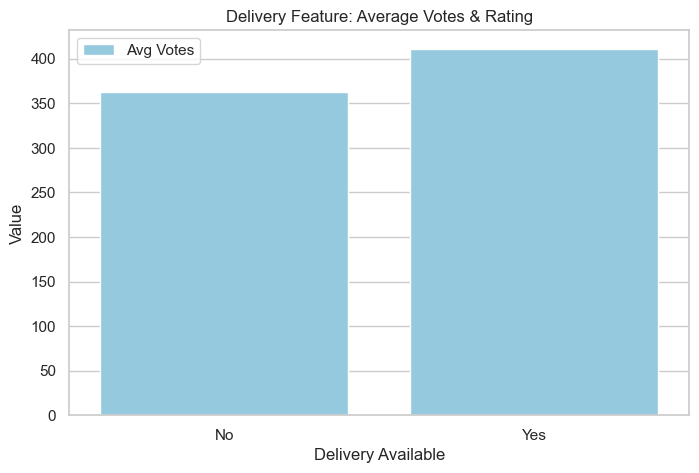

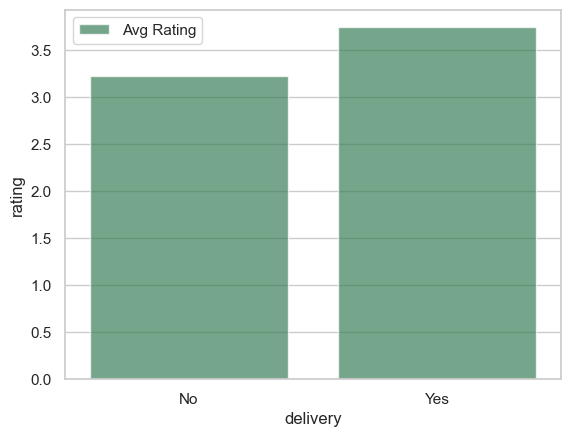

In [56]:
delivery_plot = delivery_group.reset_index()
delivery_plot['delivery'] = delivery_plot['delivery'].map({0: 'No', 1: 'Yes'})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='delivery', y='votes', data=delivery_plot, color='skyblue', label='Avg Votes')

plt.title('Delivery Feature: Average Votes & Rating')
plt.xlabel('Delivery Available')
plt.ylabel('Value')
plt.legend()


plt.show()

sns.barplot(x='delivery', y='rating', data=delivery_plot, color='seagreen', alpha=0.7, label='Avg Rating')

plt.show()

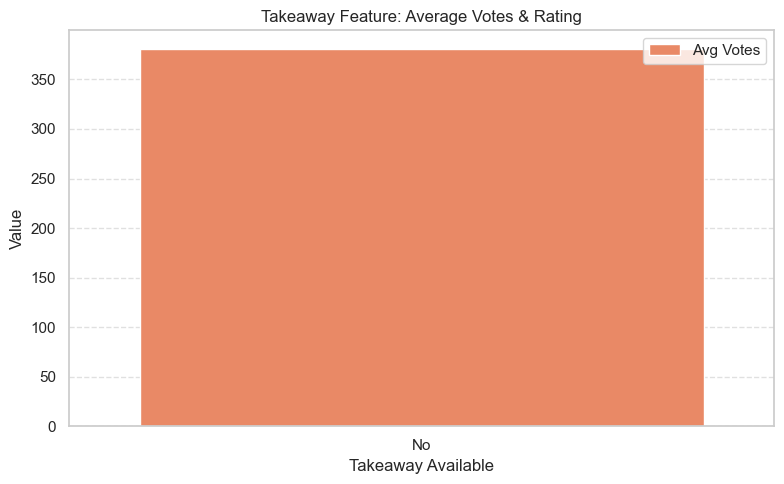

<Axes: xlabel='takeaway', ylabel='rating'>

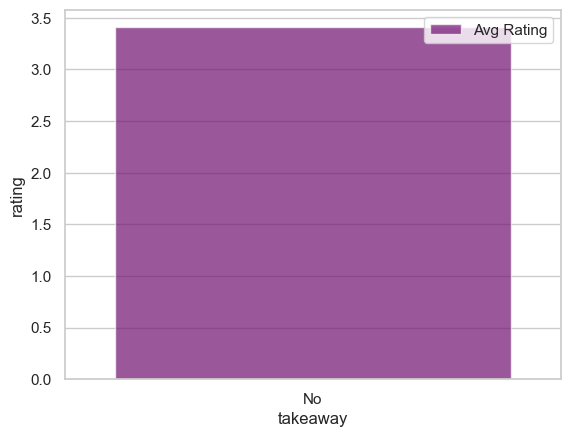

In [58]:
#take away plot
takeaway_plot = takeaway_group.reset_index()
takeaway_plot['takeaway'] = takeaway_plot['takeaway'].map({0: 'No', 1: 'Yes'})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='takeaway', y='votes', data=takeaway_plot, color='coral', label='Avg Votes')


plt.title('Takeaway Feature: Average Votes & Rating')
plt.xlabel('Takeaway Available')
plt.ylabel('Value')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

sns.barplot(x='takeaway', y='rating', data=takeaway_plot, color='purple', alpha=0.7, label='Avg Rating')


<h3 style="color: #e0e0e0; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px;">
  <i>7️⃣ Top-Rated Restaurants by City</i>
</h3>

In [ ]:

top_rated_per_city = df.sort_values(['rating'], ascending=[False]).drop_duplicates('city', keep='first')
top_rated_per_city[['city','name','rating','cost']].head(10)


,city,name,rating,cost
4,Agra,The Salt Cafe Kitchen & Bar,4.9,1000
211890,Vadodara,Indish Lounge,4.9,1400
51329,Dehradun,Barbeque Nation,4.9,1200
3266,Ahmedabad,Yanki Sizzlers,4.9,1200
199025,Udaipur,Traditional Khana,4.9,1000
55437,Gurgaon,Feel Alive,4.9,1200
55651,New Delhi,Dragonfly Experience,4.9,4000
89471,Jaipur,The Barbeque Company,4.9,1200
33906,Chennai,AB's - Absolute Barbecues,4.9,1400
197569,Trivandrum,Villa Maya Heritage Restaurant,4.9,1000


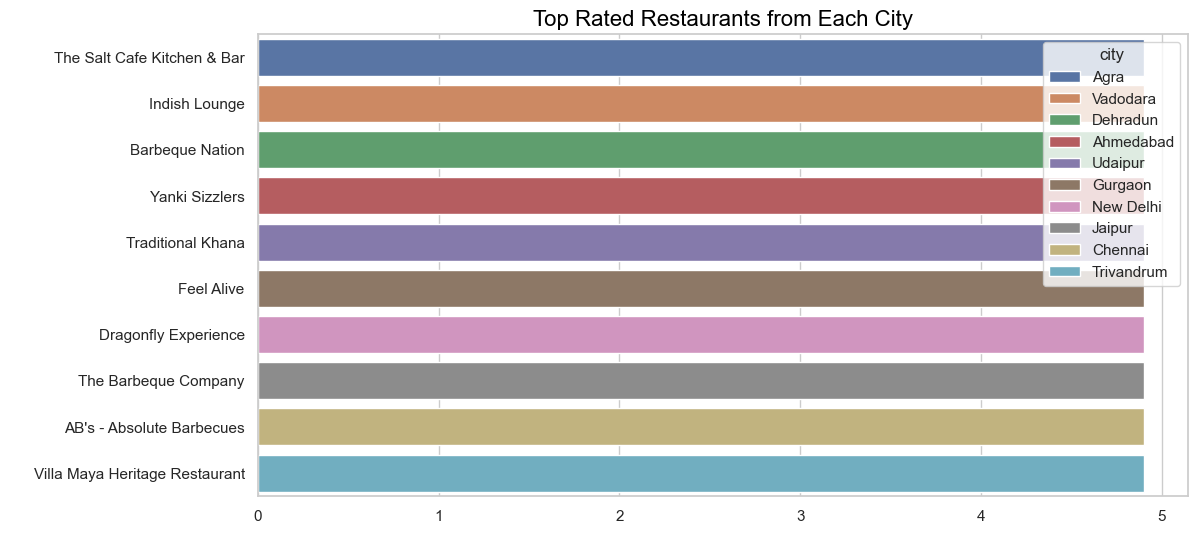

In [85]:
#plotting top rated per city
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='name', data=top_rated_per_city.head(10),hue='city')
plt.title('Top Rated Restaurants from Each City', fontsize=16, color='black')
plt.xlabel('Restaurant Name', fontsize=14, color='white')
plt.ylabel('City', fontsize=14, color='white')

plt.show()


<h3 style="color: #e0e0e0; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px;">
  <i>8️⃣ Cuisines vs Cost</i>
</h3>

<p style="color: #cccccc; font-size: 15.5px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6;">
  Analyzes how the average cost for two varies across different cuisines.
  Uses boxplots to highlight whether certain cuisines are priced consistently higher or lower.
</p>

In [96]:
avg_cost=df.groupby('cuisines')['cost'].mean().round(2)
avg_cost



cuisines
Afghan                                                     343.33
Afghan, American                                           250.00
Afghan, Arabian, BBQ, Beverages, Biryani, Maharashtrian    350.00
Afghan, Arabian, BBQ, Beverages, Burger                    200.00
Afghan, Arabian, Biryani                                   300.00
                                                            ...  
Wraps, Sandwich, Pizza, BBQ                                100.00
Wraps, Sandwich, Pizza, Bakery                             300.00
Wraps, Sandwich, Rolls, Fast Food, Burger                  100.00
Wraps, Sandwich, Rolls, Pizza, Burger                      200.00
Wraps, Sandwich, Salad, Pizza, Burger, Beverages           200.00
Name: cost, Length: 9382, dtype: float64

In [122]:
top_cuisine_names = top_cuisines.index.tolist()
df_exploded = df.copy()
df_exploded['cuisines'] = df['cuisines'].str.split(',')
df_exploded = df_exploded.explode('cuisines')
df_exploded['cuisines'] = df_exploded['cuisines'].str.lower().str.strip()

# Filter only top cuisines
filtered_df = df_exploded[df_exploded['cuisines'].isin(top_cuisine_names)]
# filtered_df.value_counts()
filtered_df[['cuisines','cost']].head(10)

,cuisines,cost
0,north indian,700
0,south indian,700
0,desserts,700
1,north indian,600
1,chinese,600
1,fast food,600
2,fast food,300
3,desserts,300
3,fast food,300
3,south indian,300


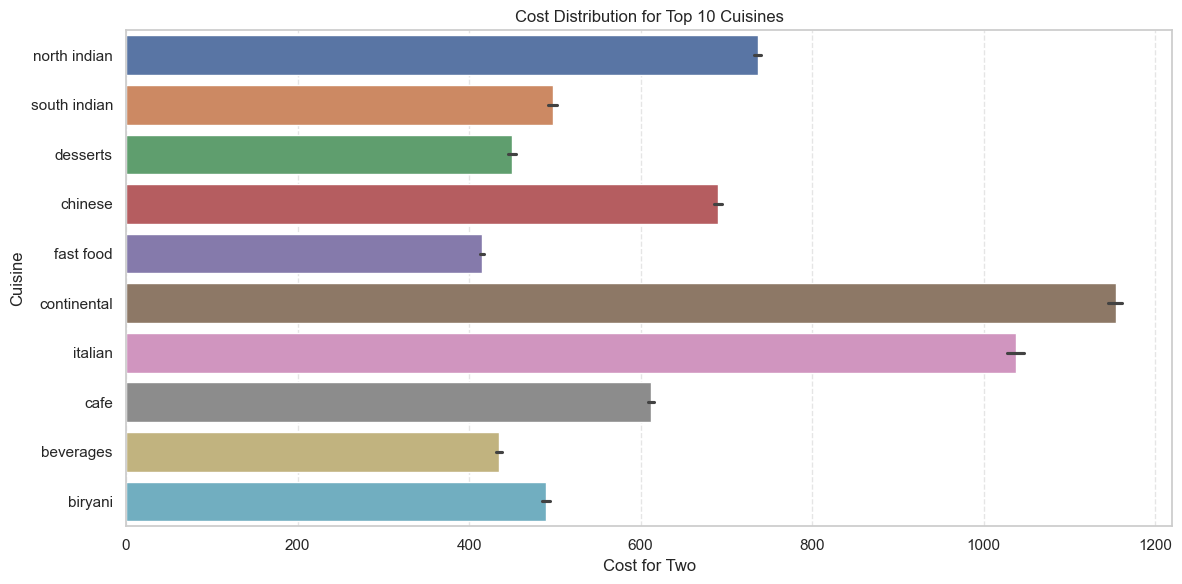

In [103]:
#plotting

plt.figure(figsize=(12, 6))
sns.barplot(x='cost', y='cuisines', data=filtered_df,hue='cuisines')

plt.title('Cost Distribution for Top 10 Cuisines')
plt.xlabel('Cost for Two')
plt.ylabel('Cuisine')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h3 style="color: #e0e0e0; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px;">
  <i>9️⃣ Best Value-for-Money Restaurants</i>
</h3>

In [116]:
#filtering if any cost 0 records are present
filtered_df = filtered_df[filtered_df['cost'] > 0]

#creating a value score 
filtered_df['value_score'] = filtered_df['rating'] / filtered_df['cost']

# filtered_df.columns
top_value_restaurants = filtered_df.sort_values(by='value_score', ascending=False).head(10)
top_value_restaurants = top_value_restaurants[['name', 'city', 'rating', 'cost', 'votes', 'value_score']]
top_value_restaurants


,name,city,rating,cost,votes,value_score
24801,Shiv T.M Sharma Fast Food,Bhopal,3.2,2,7,1.600
8848,Dhanna Kachori,Ajmer,3.9,20,46,0.195
8948,Dhanna Kachori,Ajmer,3.9,20,46,0.195
9048,Dhanna Kachori,Ajmer,3.9,20,46,0.195
8119,Dhanna Kachori,Ajmer,3.9,20,46,0.195
8748,Dhanna Kachori,Ajmer,3.9,20,46,0.195
7835,Dhanna Kachori,Ajmer,3.9,20,46,0.195
7682,Dhanna Kachori,Ajmer,3.9,20,46,0.195
7466,Dhanna Kachori,Ajmer,3.9,20,46,0.195
6951,Dhanna Kachori,Ajmer,3.9,20,46,0.195


In [ ]:
# to overcome duplicate issue
top_value_unique = filtered_df.sort_values(by='value_score', ascending=False)
top_value_unique = top_value_unique.drop_duplicates(subset=['name', 'city'], keep='first')

# Then take top 10
top_value_unique = top_value_unique[['name', 'city', 'rating', 'cost', 'votes', 'value_score']].head(10)
top_value_unique

,name,city,rating,cost,votes,value_score
24801,Shiv T.M Sharma Fast Food,Bhopal,3.2,2,7,1.6000
8848,Dhanna Kachori,Ajmer,3.9,20,46,0.1950
19830,Shree Vishnu Thatte Idli,Bangalore,3.9,40,46,0.0975
121567,Sharma Ji Ki Chai,Lucknow,4.8,50,1041,0.0960
101139,MD Vada Pav,Jodhpur,3.7,40,29,0.0925
89247,Shankar Samosa,Jaipur,4.5,50,1297,0.0900
7967,Mahakal,Ajmer,3.5,40,16,0.0875
56803,Fateh Ki Kachori,New Delhi,4.3,50,461,0.0860
119728,Bajpayee Kachodi Bhandar,Lucknow,4.2,50,1307,0.0840
27631,The Tea Cube,Bhubaneshwar,4.2,50,43,0.0840


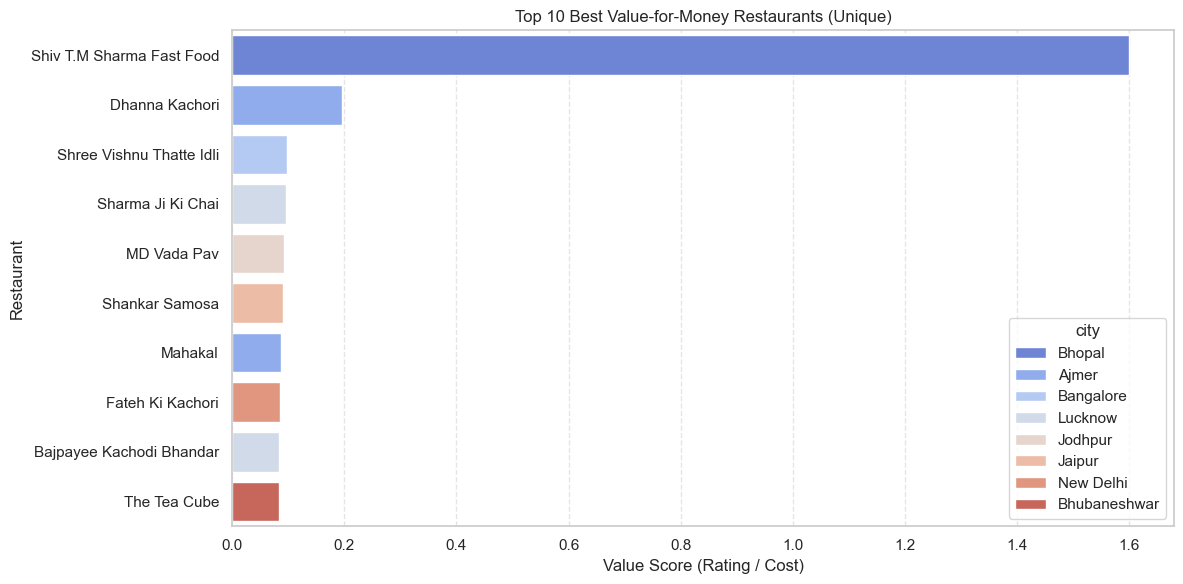

In [119]:
plt.figure(figsize=(12,6))
sns.barplot(y='name', x='value_score', data=top_value_unique, hue='city', palette='coolwarm')
plt.title('Top 10 Best Value-for-Money Restaurants (Unique)')
plt.xlabel('Value Score (Rating / Cost)')
plt.ylabel('Restaurant')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h3 style="color: #e0e0e0; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 30px;">
  <i>🔟 Business Recommendations</i>
</h3>

<h2 style="color: #f1f1f1; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
  📌 Top Insights from the Data
</h2>

<!-- Insight 1 -->
<h3 style="color: #e0e0e0;">📍 1. Where are most restaurants located?</h3>
<p style="color: #cccccc;">Chennai, Mumbai, and Bangalore have the highest number of restaurants on Zomato.</p>
<p style="color: #cccccc;">Even smaller cities like Ajmer, Jabalpur, and Kochi have thousands of listings!</p>
<p style="color: #a8ff60;">✅ Zomato has strong coverage across both big metros and smaller towns.</p>

<!-- Insight 2 -->
<h3 style="color: #e0e0e0;">🍽️ 2. What cuisines do Indians love the most?</h3>
<p style="color: #cccccc;">North Indian, Chinese, and Fast Food are the top 3.</p>
<p style="color: #cccccc;">Others like South Indian, Desserts, and Cafes are also widely offered.</p>
<p style="color: #a8ff60;">🍛 Local and casual food options dominate the platform.</p>

<!-- Insight 3 -->
<h3 style="color: #e0e0e0;">💰 3. Which cities are expensive for dining?</h3>
<table style="width: 100%; color: #cccccc; border-collapse: collapse;">
  <thead>
    <tr style="background-color: #333;">
      <th style="padding: 8px; border: 1px solid #555;">City</th>
      <th style="padding: 8px; border: 1px solid #555;">Avg Cost for Two</th>
    </tr>
  </thead>
  <tbody>
    <tr><td style="padding: 8px; border: 1px solid #555;">Mumbai</td><td style="padding: 8px; border: 1px solid #555;">₹1389</td></tr>
    <tr><td style="padding: 8px; border: 1px solid #555;">New Delhi</td><td style="padding: 8px; border: 1px solid #555;">₹1379</td></tr>
    <tr><td style="padding: 8px; border: 1px solid #555;">Gurgaon</td><td style="padding: 8px; border: 1px solid #555;">₹1334</td></tr>
    <tr><td style="padding: 8px; border: 1px solid #555;">Bangalore</td><td style="padding: 8px; border: 1px solid #555;">₹1036</td></tr>
    <tr><td style="padding: 8px; border: 1px solid #555;">Pune</td><td style="padding: 8px; border: 1px solid #555;">₹980</td></tr>
  </tbody>
</table>
<p style="color: #a8ff60;">🏙️ Metro cities are costlier, while others like Hyderabad and Chennai are more affordable.</p>

<!-- Insight 4 -->
<h3 style="color: #e0e0e0;">💸 4. Does a higher price mean better ratings?</h3>
<p style="color: #ff8080;">❌ No clear link.</p>
<p style="color: #cccccc;">Some cheap restaurants have amazing ratings, and some expensive ones don’t.</p>
<p style="color: #a8ff60;">💡 Quality is not always about price.</p>

<!-- Insight 5 -->
<h3 style="color: #e0e0e0;">📊 5. Which restaurants are most popular?</h3>
<table style="width: 100%; color: #cccccc; border-collapse: collapse;">
  <thead>
    <tr style="background-color: #333;">
      <th style="padding: 8px; border: 1px solid #555;">Restaurant Name</th>
      <th style="padding: 8px; border: 1px solid #555;">City</th>
      <th style="padding: 8px; border: 1px solid #555;">Votes</th>
      <th style="padding: 8px; border: 1px solid #555;">Rating</th>
    </tr>
  </thead>
  <tbody>
    <tr><td style="padding: 8px; border: 1px solid #555;">Bawarchi</td><td style="padding: 8px; border: 1px solid #555;">Hyderabad</td><td style="padding: 8px; border: 1px solid #555;">42,539</td><td style="padding: 8px; border: 1px solid #555;">4.5</td></tr>
    <tr><td style="padding: 8px; border: 1px solid #555;">Truffles</td><td style="padding: 8px; border: 1px solid #555;">Bangalore</td><td style="padding: 8px; border: 1px solid #555;">15,582</td><td style="padding: 8px; border: 1px solid #555;">4.6</td></tr>
    <tr><td style="padding: 8px; border: 1px solid #555;">Hauz Khas Social</td><td style="padding: 8px; border: 1px solid #555;">New Delhi</td><td style="padding: 8px; border: 1px solid #555;">14,751</td><td style="padding: 8px; border: 1px solid #555;">4.8</td></tr>
  </tbody>
</table>
<p style="color: #a8ff60;">🌟 Highly-rated restaurants also get the most votes — a sign of popularity and trust.</p>

<!-- Insight 6 -->
<h3 style="color: #e0e0e0;">🚚 6. Does delivery or takeaway make a difference?</h3>
<table style="width: 100%; color: #cccccc; border-collapse: collapse;">
  <thead>
    <tr style="background-color: #333;">
      <th style="padding: 8px; border: 1px solid #555;">Feature</th>
      <th style="padding: 8px; border: 1px solid #555;">Avg Rating</th>
      <th style="padding: 8px; border: 1px solid #555;">Avg Votes</th>
    </tr>
  </thead>
  <tbody>
    <tr><td style="padding: 8px; border: 1px solid #555;">Delivery ✅</td><td style="padding: 8px; border: 1px solid #555;">3.74</td><td style="padding: 8px; border: 1px solid #555;">411</td></tr>
    <tr><td style="padding: 8px; border: 1px solid #555;">No Delivery ❌</td><td style="padding: 8px; border: 1px solid #555;">3.22</td><td style="padding: 8px; border: 1px solid #555;">362</td></tr>
  </tbody>
</table>
<p style="color: #a8ff60;">✔️ Restaurants with delivery get more love and attention from customers.</p>

<!-- Insight 7 -->
<h3 style="color: #e0e0e0;">⭐ 7. Which cities have the top-rated restaurants?</h3>
<p style="color: #cccccc;">4.9-star restaurants found in Agra, Ahmedabad, Delhi, Jaipur, Chennai, and more.</p>
<p style="color: #cccccc;">Many of these charge between ₹1000–₹1400, showing quality and mid-range pricing.</p>
<p style="color: #a8ff60;">🥇 Good food experiences aren’t limited to big cities.</p>

<!-- Insight 8 -->
<h3 style="color: #e0e0e0;">📦 8. How does cost vary across cuisines?</h3>
<p style="color: #cccccc;"><strong>Low-Cost:</strong> Fast Food, South Indian, and Desserts (as low as ₹300)</p>
<p style="color: #cccccc;"><strong>Higher Cost:</strong> Continental, Japanese, and European (seen in boxplot)</p>
<p style="color: #a8ff60;">💡 Budget food dominates, but there’s room for premium cuisine growth.</p>

<!-- Insight 9 -->
<h3 style="color: #e0e0e0;">🏷️ 9. Who gives the best value for money?</h3>
<table style="width: 100%; color: #cccccc; border-collapse: collapse;">
  <thead>
    <tr style="background-color: #333;">
      <th style="padding: 8px; border: 1px solid #555;">Restaurant Name</th>
      <th style="padding: 8px; border: 1px solid #555;">City</th>
      <th style="padding: 8px; border: 1px solid #555;">Rating</th>
      <th style="padding: 8px; border: 1px solid #555;">Cost</th>
      <th style="padding: 8px; border: 1px solid #555;">Value Score</th>
    </tr>
  </thead>
  <tbody>
    <tr><td style="padding: 8px; border: 1px solid #555;">Shiv T.M Sharma Fast Food</td><td style="padding: 8px; border: 1px solid #555;">Bhopal</td><td style="padding: 8px; border: 1px solid #555;">3.2</td><td style="padding: 8px; border: 1px solid #555;">₹2</td><td style="padding: 8px; border: 1px solid #555;">1.60</td></tr>
    <tr><td style="padding: 8px; border: 1px solid #555;">Sharma Ji Ki Chai</td><td style="padding: 8px; border: 1px solid #555;">Lucknow</td><td style="padding: 8px; border: 1px solid #555;">4.8</td><td style="padding: 8px; border: 1px solid #555;">₹50</td><td style="padding: 8px; border: 1px solid #555;">0.096</td></tr>
    <tr><td style="padding: 8px; border: 1px solid #555;">Fateh Ki Kachori</td><td style="padding: 8px; border: 1px solid #555;">Delhi</td><td style="padding: 8px; border: 1px solid #555;">4.3</td><td style="padding: 8px; border: 1px solid #555;">₹50</td><td style="padding: 8px; border: 1px solid #555;">0.086</td></tr>
  </tbody>
</table>
<p style="color: #a8ff60;">🔥 These places deliver great food at the lowest prices — truly value-for-money champions.</p>

<!-- Final Suggestions -->
<h3 style="color: #e0e0e0;">💼 Business Suggestions for Zomato</h3>
<ol style="color: #cccccc; font-size: 15.5px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6;">
  <li>🚀 <strong>Promote Value Restaurants</strong>: Add a “Top Value” badge to highlight high-rating + low-cost places.</li>
  <li>🏙️ <strong>Expand in Affordable Cities</strong>: Focus growth on Hyderabad, Lucknow, Jaipur, etc.</li>
  <li>🍽️ <strong>Support Local Favorites</strong>: Promote fast-moving cuisines like North Indian and Fast Food.</li>
  <li>📦 <strong>Encourage Delivery & Takeaway</strong>: Help small restaurants adopt delivery — improves reach and ratings.</li>
  <li>📊 <strong>Add Price Analytics</strong>: Show restaurant owners how they compare within their area or cuisine group.</li>
  <li>🌍 <strong>Use Geo Insights</strong>: Leverage heatmaps of rating + cost to identify high-potential zones.</li>
</ol>
